In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv.zip.zip to heart.csv.zip.zip


In [ ]:
# Load dataset
df = pd.read_csv("heart.csv.zip.zip")  # make sure the file name is correct

# Preview the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

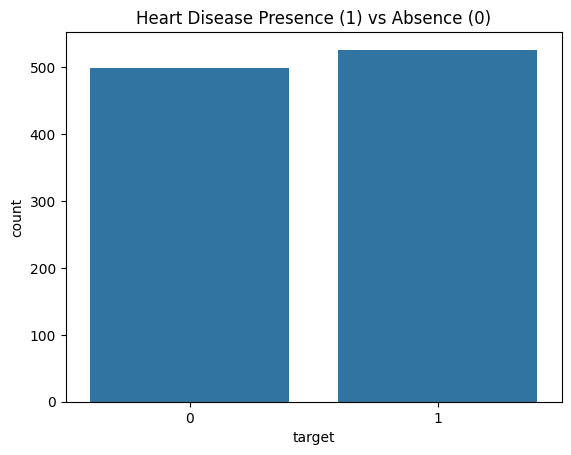

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Check for target class distribution
sns.countplot(data=df, x='target')
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=4)  # you can tune max_depth
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


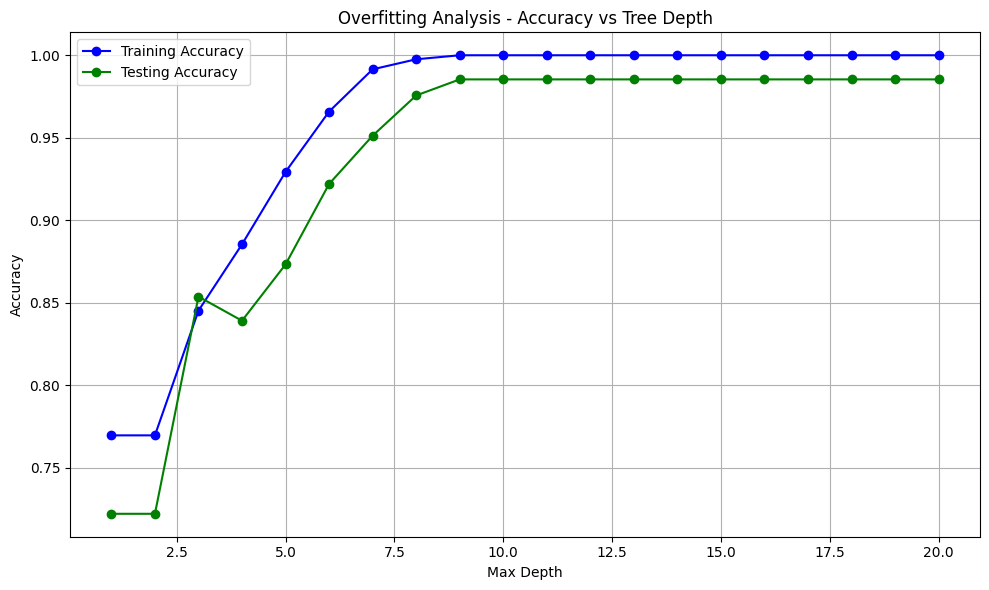

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(depths, test_accuracies, marker='o', label='Testing Accuracy', color='green')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis - Accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
best_model = DecisionTreeClassifier(max_depth=4, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[80 20]
 [13 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205


Accuracy Score: 0.8390243902439024


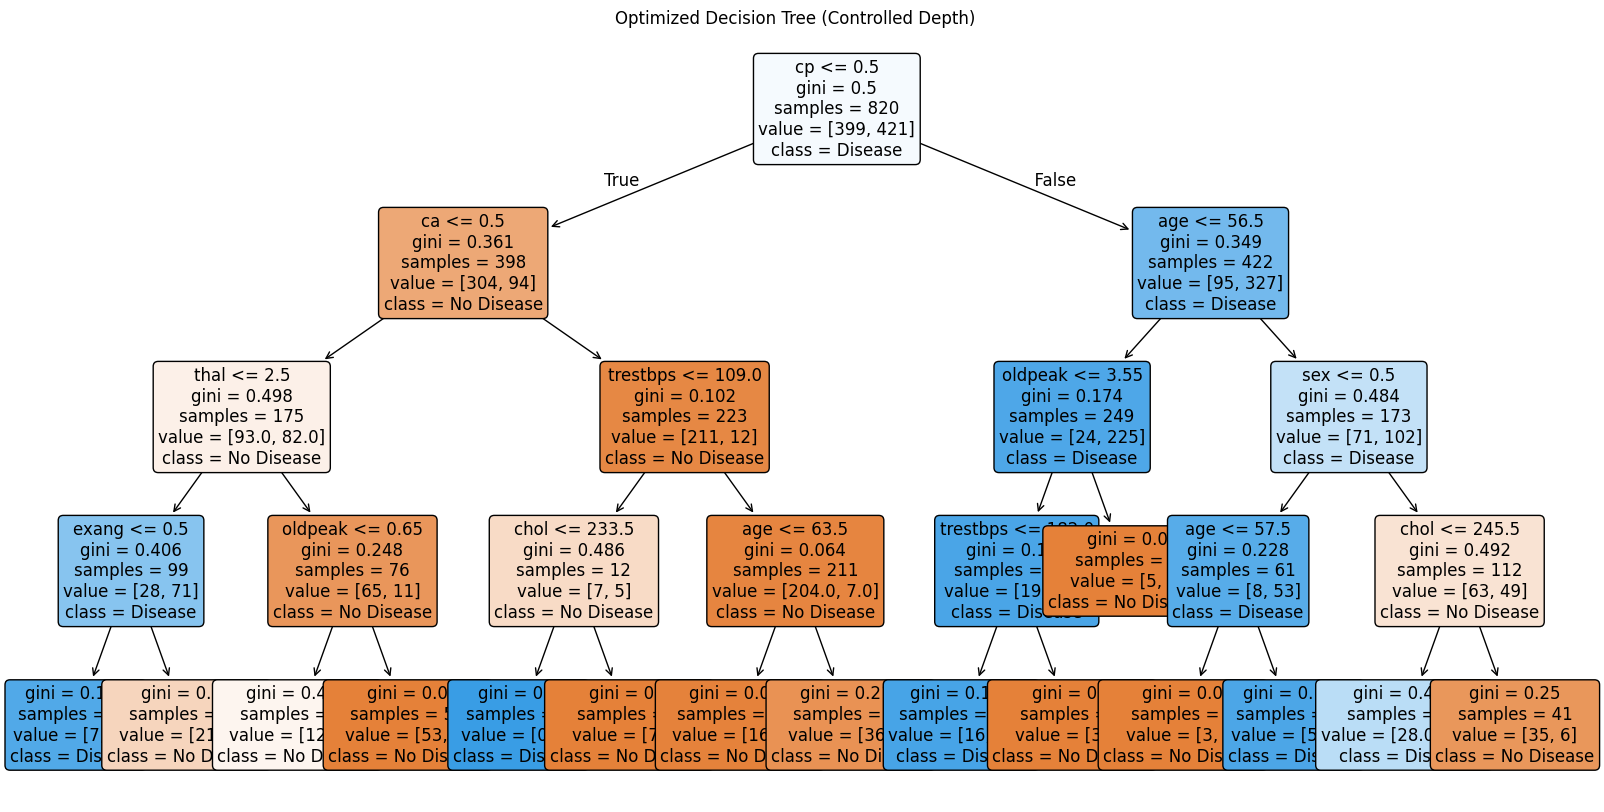

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Optimized Decision Tree (Controlled Depth)")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_clf.predict(X_test)


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nAccuracy Score:", accuracy_score(y_test, rf_pred))


Confusion Matrix:
 [[81 19]
 [ 6 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       100
           1       0.84      0.94      0.89       105

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205


Accuracy Score: 0.8780487804878049


In [ ]:
dt_accuracy = accuracy_score(y_test, best_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Decision Tree Accuracy: 0.8390
Random Forest Accuracy: 0.8780


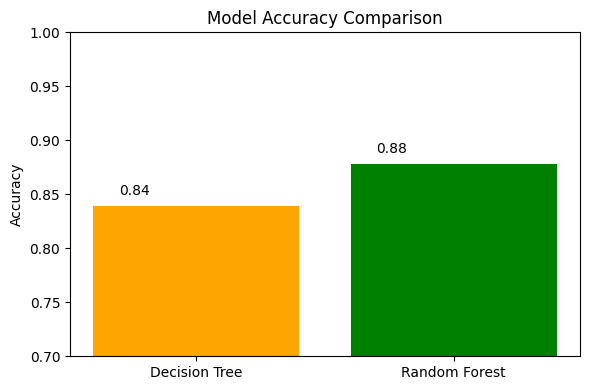

In [ ]:
plt.figure(figsize=(6,4))
bars = plt.bar(["Decision Tree", "Random Forest"], [dt_accuracy, rf_accuracy], color=['orange', 'green'])
plt.ylim(0.7, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + 0.01, f"{yval:.2f}")

plt.tight_layout()
plt.show()


In [ ]:
# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_imp_df


,Feature,Importance
2,cp,0.200275
12,thal,0.139010
11,ca,0.137932
8,exang,0.113879
9,oldpeak,0.105612
7,thalach,0.104361
10,slope,0.054410
0,age,0.054252
3,trestbps,0.034844
4,chol,0.026850


/tmp/ipython-input-20-2511009955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


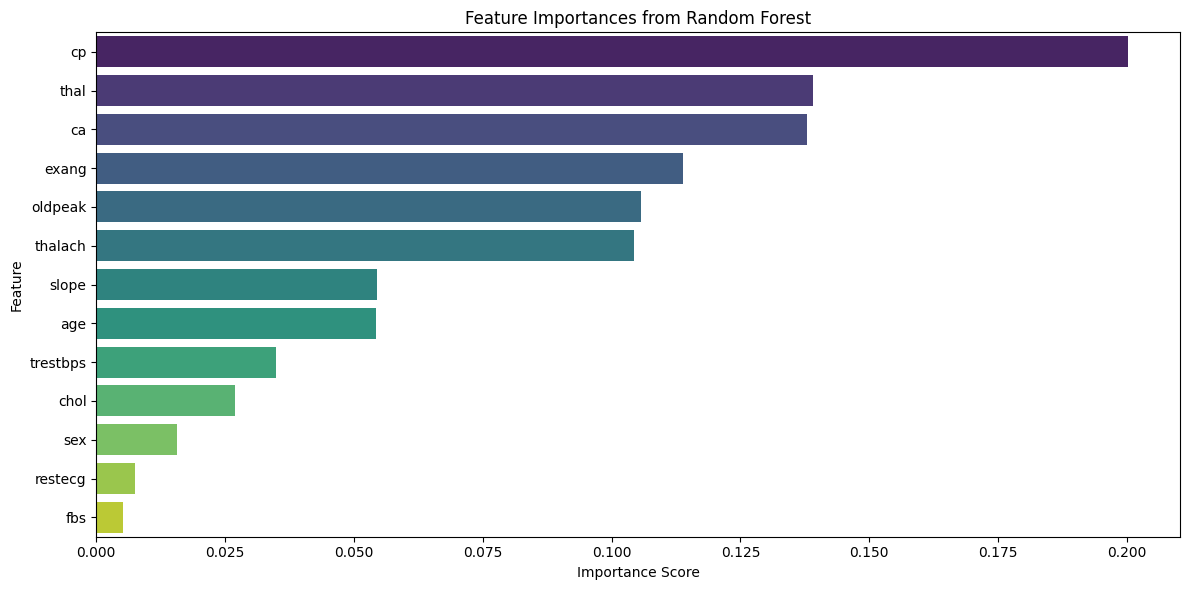

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
for feature, score in zip(feature_imp_df['Feature'], feature_imp_df['Importance']):
    print(f"{feature:20} : {score:.4f}")


cp                   : 0.2003
thal                 : 0.1390
ca                   : 0.1379
exang                : 0.1139
oldpeak              : 0.1056
thalach              : 0.1044
slope                : 0.0544
age                  : 0.0543
trestbps             : 0.0348
chol                 : 0.0269
sex                  : 0.0157
restecg              : 0.0076
fbs                  : 0.0053


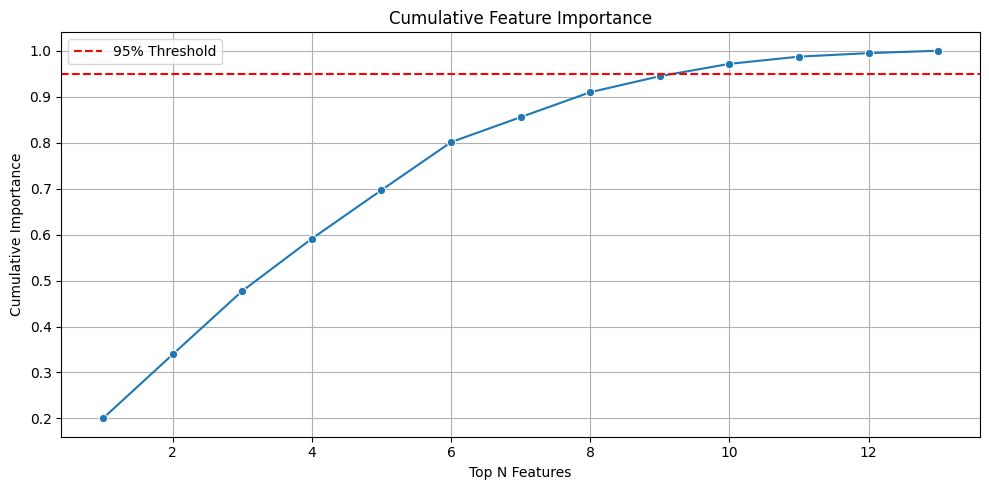

In [ ]:
feature_imp_df['Cumulative Importance'] = feature_imp_df['Importance'].cumsum()

plt.figure(figsize=(10,5))
sns.lineplot(data=feature_imp_df, x=range(1, len(feature_imp_df)+1), y='Cumulative Importance', marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% Threshold')
plt.title("Cumulative Feature Importance")
plt.xlabel("Top N Features")
plt.ylabel("Cumulative Importance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate


In [ ]:
# 5-fold cross-validation for Decision Tree
dt_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Accuracy Scores:", dt_scores)
print("Mean Accuracy:", np.mean(dt_scores))
print("Standard Deviation:", np.std(dt_scores))


Decision Tree Cross-Validation Accuracy Scores: [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415]
Mean Accuracy: 0.8341463414634147
Standard Deviation: 0.023897460905201732


In [ ]:
# 5-fold cross-validation for Random Forest
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')

print("Random Forest Cross-Validation Accuracy Scores:", rf_scores)
print("Mean Accuracy:", np.mean(rf_scores))
print("Standard Deviation:", np.std(rf_scores))


Random Forest Cross-Validation Accuracy Scores: [0.93658537 0.87804878 0.92682927 0.87317073 0.85853659]
Mean Accuracy: 0.8946341463414635
Standard Deviation: 0.03109732185465218


In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(rf_clf, X, y, cv=5, scoring=scoring)

# Display average scores
for metric in scoring:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    print(f"{metric.capitalize()} (Random Forest): {mean_score:.4f}")


Accuracy (Random Forest): 0.8946
Precision (Random Forest): 0.8669
Recall (Random Forest): 0.9393
F1 (Random Forest): 0.9014


In [ ]:
# Features and target for regression
X_reg = df.drop('thalach', axis=1)
y_reg = df['thalach']


In [ ]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_dt = dt_reg.predict(X_test_reg)

mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
r2_dt = r2_score(y_test_reg, y_pred_dt)

print("Decision Tree Regressor MSE:", mse_dt)
print("Decision Tree Regressor R² Score:", r2_dt)


Decision Tree Regressor MSE: 336.38179298995686
Decision Tree Regressor R² Score: 0.37989601344801893


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)


RandomForestRegressor(max_depth=4, random_state=42)

In [34]:
y_pred_rf = rf_reg.predict(X_test_reg)

mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor R² Score:", r2_rf)


Random Forest Regressor MSE: 273.25472650974876
Random Forest Regressor R² Score: 0.49626778623560763


In [35]:
print("📌 Model Comparison (Regression):")
print(f"Decision Tree  -> MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")
print(f"Random Forest  -> MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


📌 Model Comparison (Regression):
Decision Tree  -> MSE: 336.38, R²: 0.38
Random Forest  -> MSE: 273.25, R²: 0.50


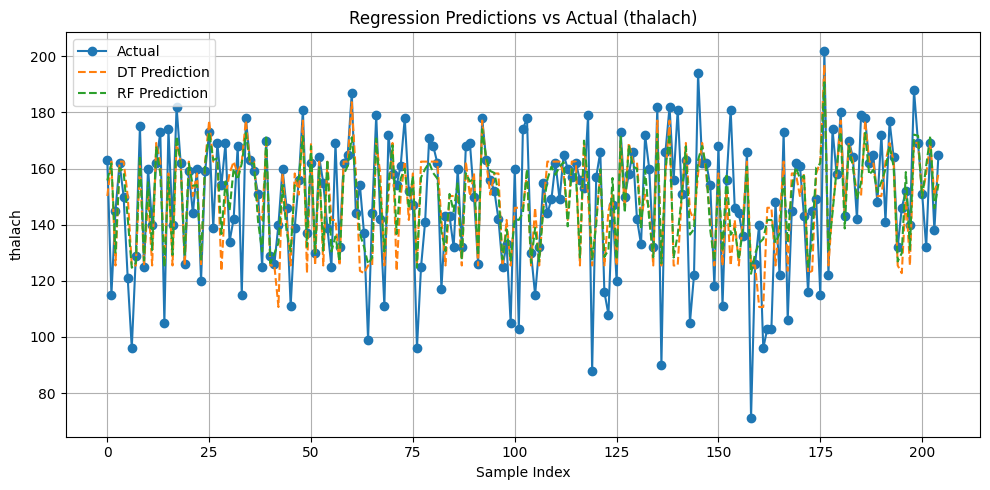

In [36]:
plt.figure(figsize=(10,5))
plt.plot(y_test_reg.values, label='Actual', marker='o')
plt.plot(y_pred_dt, label='DT Prediction', linestyle='--')
plt.plot(y_pred_rf, label='RF Prediction', linestyle='--')
plt.legend()
plt.title("Regression Predictions vs Actual (thalach)")
plt.xlabel("Sample Index")
plt.ylabel("thalach")
plt.grid(True)
plt.tight_layout()
plt.show()
